In [ ]:
import numpy as np
import pandas as pd


dfs = []
for i in range(1,5):
    path = 'UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)

# This csv file contains names of all the features
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
data.columns = df_col['Name']
dataSet = data
dataSet.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164.0,31.0,...,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304.0,31.0,...,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178.0,31.0,...,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164.0,31.0,...,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178.0,31.0,...,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90096 entries, 0 to 90095
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   srcip             90096 non-null  object 
 1   sport             90096 non-null  int64  
 2   dstip             90096 non-null  object 
 3   dsport            90096 non-null  object 
 4   proto             90095 non-null  object 
 5   state             90095 non-null  object 
 6   dur               90095 non-null  float64
 7   sbytes            90095 non-null  float64
 8   dbytes            90095 non-null  float64
 9   sttl              90095 non-null  float64
 10  dttl              90095 non-null  float64
 11  sloss             90095 non-null  float64
 12  dloss             90095 non-null  float64
 13  service           90095 non-null  object 
 14  sload             90095 non-null  float64
 15  dload             90095 non-null  float64
 16  spkts             90095 non-null  float6

In [ ]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 36 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.5' '149.171.126.8' '149.171.126.3'
 '149.171.126.6' '149.171.126.4' '149.171.126.2' '149.171.126.9'
 '149.171.126.7' '149.171.126.0' '149.171.126.1' '149.171.126.18'
 '10.40.85.10' '149.171.126.12' '10.40.182.6' '149.171.126.11']
sport have 44055 value : [ 1390 33661  1464 ... 10738 41402 44988]
dstip have 43 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.171.126.12' '149.171.126.13' '149.171.126.11'
 '224.0.0.5' '149.

In [ ]:
# Select only categorical columns
categorical_columns = dataSet.select_dtypes(include=['object']).columns
# Initialize an empty dictionary to store results
result_dict = {}

# Iterate through each categorical column
for column in categorical_columns:
    # Calculate value counts
    value_counts = dataSet[column].value_counts()

    # Calculate percentages
    percentages = (value_counts / len(dataSet[column])) * 100

    # Combine counts and percentages into a DataFrame
    result_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })

    # Store the result in the dictionary
    result_dict[column] = result_df

# Print the results
for column, result_df in result_dict.items():
    print(f"Column: {column}")
    print(result_df)
    print()

Column: srcip
                 Count  Percentage
175.45.176.3      7549    8.378840
59.166.0.4        7483    8.305585
149.171.126.18    7439    8.256748
59.166.0.1        7160    7.947079
59.166.0.6        7122    7.904901
59.166.0.2        7105    7.886033
59.166.0.5        7065    7.841636
59.166.0.0        7061    7.837196
59.166.0.3        7051    7.826097
59.166.0.8        6893    7.650728
59.166.0.7        6772    7.516427
59.166.0.9        6664    7.396555
175.45.176.1      1697    1.883546
175.45.176.0      1308    1.451785
175.45.176.2       939    1.042222
10.40.182.1        154    0.170929
10.40.85.1         152    0.168709
10.40.182.6        121    0.134301
10.40.170.2         84    0.093234
10.40.182.3         84    0.093234
10.40.85.30         81    0.089904
149.171.126.12      23    0.025528
192.168.241.243     20    0.022199
10.40.85.10         18    0.019979
149.171.126.9        7    0.007769
149.171.126.3        6    0.006660
149.171.126.5        6    0.006660
149.17

In [ ]:
dataSet['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', ' Fuzzers ', ' Shellcode ', 'Backdoor',
       ' Reconnaissance ', 'Analysis'], dtype=object)

In [ ]:
dataSet['attack_cat'] = dataSet.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())
dataSet['attack_cat'] = dataSet['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
dataSet['attack_cat'].unique()

array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

In [ ]:
# Replace '-' with 'unknown'
dataSet['service'] = dataSet['service'].replace('-', 'unknown')

In [ ]:
# Remove leading and trailing whitespaces
dataSet['ct_ftp_cmd'] = dataSet['ct_ftp_cmd'].astype(str).str.strip()

# Replace empty strings with NaN
dataSet['ct_ftp_cmd'].replace('', np.nan, inplace=True)

# Convert the column to numeric type
dataSet['ct_ftp_cmd'] = pd.to_numeric(dataSet['ct_ftp_cmd'], errors='coerce')

In [ ]:
dataSet['ct_ftp_cmd'].unique()

array([ 0.,  1.,  6.,  2., nan,  4.])

In [ ]:
numerical_col = dataSet.select_dtypes(include=np.number).columns  # All the numerical columns list
categorical_col = dataSet.select_dtypes(exclude=np.number).columns  # All the categorical columns list

# Calculate the median and replace null values

for col in dataSet.columns:
    if dataSet[col].dtypes == 'object' :
        val = dataSet[col].mode().values[0]  # Mode value of the column in train data
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    else:
        val = dataSet[col].median()
        dataSet[col] = dataSet[col].fillna(value=val).replace(' ', val)
    print(col,val)

srcip 175.45.176.3
sport 1043
dstip 175.45.176.3
dsport 53
proto tcp
state FIN
dur 0.012014
sbytes 1028.0
dbytes 1194.0
sttl 31.0
dttl 29.0
sloss 2.0
dloss 2.0
service unknown
sload 614500.8125
dload 392041.9063
spkts 10.0
dpkts 8.0
swin 255.0
dwin 255.0
stcpb 415069537.5
dtcpb 408906234.0
smeansz 73.0
dmeansz 89.0
trans_depth 0.0
res_bdy_len 0.0
sjit 17.08251
djit 0.0
stime 1424231447.0
ltime 1424231447.0
sintpkt 0.445
dintpkt 0.37620600000000004
tcprtt 0.000601
synack 0.000474
ackdat 0.00012
is_sm_ips_ports 0.0
ct_state_ttl 0.0
ct_flw_http_mthd 0.0
is_ftp_login 0.0
ct_ftp_cmd 0.0
ct_srv_src 5.0
ct_srv_dst 5.0
ct_dst_ltm 4.0
ct_src_ltm 4.0
ct_src_dport_ltm 1.0
ct_dst_sport_ltm 1.0
ct_dst_src_ltm 2.0
attack_cat normal
label 0.0


In [ ]:
# Iterate through each column and print unique values
for col in dataSet.columns:
    unique_values = dataSet[col].unique()
    num_distinct_values = dataSet[col].nunique()
    print(f'{col} have {num_distinct_values} value : {unique_values}')

srcip have 36 value : ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.5' '149.171.126.8' '149.171.126.3'
 '149.171.126.6' '149.171.126.4' '149.171.126.2' '149.171.126.9'
 '149.171.126.7' '149.171.126.0' '149.171.126.1' '149.171.126.18'
 '10.40.85.10' '149.171.126.12' '10.40.182.6' '149.171.126.11']
sport have 44055 value : [ 1390 33661  1464 ... 10738 41402 44988]
dstip have 43 value : ['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.171.126.12' '149.171.126.13' '149.171.126.11'
 '224.0.0.5' '149.

In [ ]:
# Fixing binary columns
dataSet['is_ftp_login'] = np.where(dataSet['is_ftp_login']>1, 1, dataSet['is_ftp_login'])
for col in dataSet.columns:
    print(col)
    print(dataSet[col].unique())

srcip
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '10.40.85.10'
 '10.40.182.6' '149.171.126.14']
sport
['1390' '33661' '1464' ... 40856 48599 62488]
dstip
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.1' '149.171.126.10' '149.171.126.3' '149.171.126.15'
 '149.171.126.14' '149.171.126

In [ ]:
dataSet.drop(['label','stime','ltime'], axis=1, inplace=True)

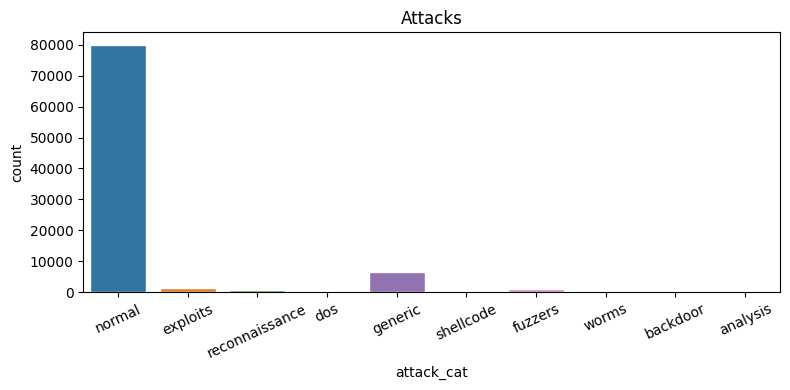

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
    # countplot of the given column
ax = sns.countplot(x='attack_cat',  data=dataSet)
ax.set_title("Attacks")
plt.xticks(rotation=25)
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNSWNB15_Attacks.png', dpi=300, format='png')
plt.show()

In [ ]:
dataSet['attack_cat'].replace({ 'dos' : 1, 'normal':0, 'reconnaissance':1, 'backdoor':1, 'exploits':1,
       'analysis':1, 'fuzzers':1, 'worms':1, 'shellcode':1, 'generic':1},inplace = True)
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'srcip' has 42 categories
Feature 'sport' has 107823 categories
Feature 'dstip' has 46 categories
Feature 'dsport' has 63447 categories
Feature 'proto' has 135 categories
Feature 'state' has 16 categories
Feature 'service' has 13 categories
Feature 'djit' has 219021 categories


In [ ]:
# Select columns with data type 'object'
object_columns = dataSet.select_dtypes(include=['object'])

# Print or use the selected columns as needed
print(object_columns)

Name        srcip          dstip dsport proto state  service
0      59.166.0.0  149.171.126.6     53   udp   CON      dns
1      59.166.0.0  149.171.126.9   1024   udp   CON  unknown
2      59.166.0.6  149.171.126.7     53   udp   CON      dns
3      59.166.0.5  149.171.126.5     53   udp   CON      dns
4      59.166.0.3  149.171.126.0     53   udp   CON      dns
...           ...            ...    ...   ...   ...      ...
90091  59.166.0.0  149.171.126.6  52801   tcp   FIN  unknown
90092  59.166.0.1  149.171.126.7     22   tcp   FIN      ssh
90093  59.166.0.8  149.171.126.9   8647   tcp   FIN  unknown
90094  59.166.0.9  149.171.126.8    111   udp   CON  unknown
90095  59.166.0.9  149.171.126.8  53863   tcp   FIN  unknown

[90096 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load
import pandas as pd
import numpy as np



le = LabelEncoder()
features = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'service', 'state']

# Fit and transform each feature using LabelEncoder
for f in features:
    dataSet[f] = dataSet[f].astype(str)
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f])
    dump(le, f'label_encoder_{f}.joblib')


In [ ]:
dataSet.head(100)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,26,2955,21,13819,7,2,0.001055,132.0,164.0,31.0,...,0.0,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,0
1,26,17851,24,66,7,2,0.036133,528.0,304.0,31.0,...,0.0,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,0
2,32,3538,22,13819,7,2,0.001119,146.0,178.0,31.0,...,0.0,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,0
3,31,19487,20,13819,7,2,0.001209,132.0,164.0,31.0,...,0.0,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,0
4,29,29714,5,13819,7,2,0.001169,146.0,178.0,31.0,...,0.0,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,25370,10,18226,6,4,0.244832,876.0,9446.0,62.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1
96,32,26585,6,13819,7,2,0.001069,130.0,162.0,31.0,...,0.0,0.0,12.0,8.0,2.0,2.0,2.0,1.0,1.0,0
97,28,21860,6,12351,7,2,0.001793,520.0,304.0,31.0,...,0.0,0.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,0
98,32,24865,20,13819,7,2,0.001112,146.0,178.0,31.0,...,0.0,0.0,12.0,9.0,1.0,2.0,2.0,1.0,1.0,0


In [ ]:
x = dataSet.iloc[:,0:45]
y = dataSet.iloc[:,45]

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

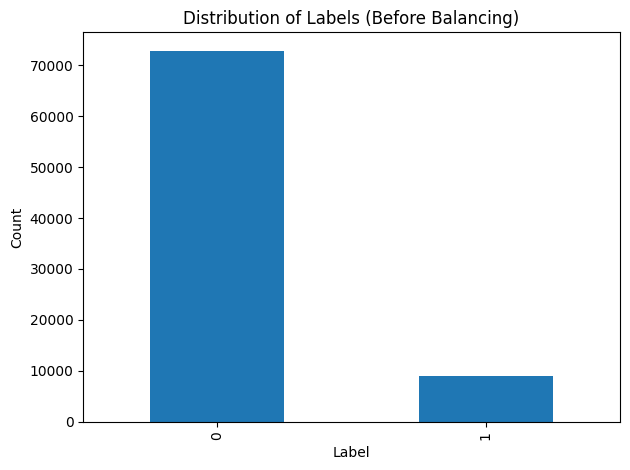

In [ ]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('UNBALANCED.png', dpi=300, format='png')
plt.show()

In [ ]:
y_train.value_counts()

0    72804
1     9002
Name: attack_cat, dtype: int64

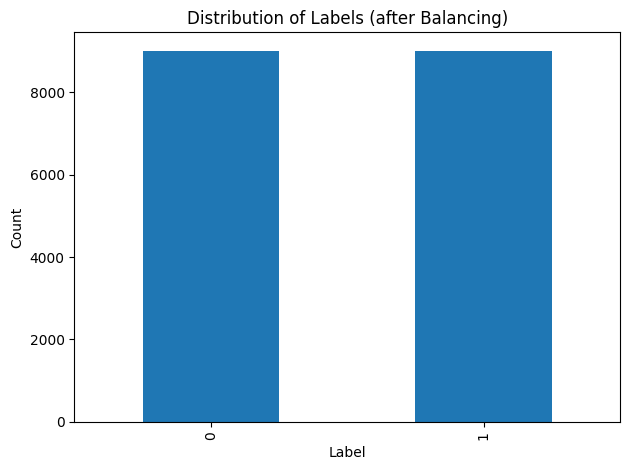

In [ ]:
#from imblearn.under_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=88)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as an PNG file
plt.savefig('BALANCED.png', dpi=300, format='png')
plt.show()

In [ ]:
y_train.value_counts()

0    9002
1    9002
Name: attack_cat, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
# fit models and make predictions
models = [Rf, dt,Lr,kNN,NB, svm]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','Naive Bayes Classifier','SVM']
results = []
i=0
for model in models:
    model.fit(x_train,y_train)
    dump(model, 'U'+model_names[i]+'InitState.joblib')
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1

# create dataframe with results
metrics_df_init = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_init)

                        Accuracy  Precision    Recall  F1 Score  False Alarm  \
RandomForestClassifier  0.989247   0.911174  0.999741  0.953405          376   
DecisionTreeClassifier  0.992099   0.938311  0.993520  0.965127          252   
LogisticRegression      0.789766   0.338155  0.951270  0.498946         7183   
K-Nearest Neighbors     0.944012   0.676410  0.941680  0.787301         1738   
Naive Bayes Classifier  0.738627   0.283003  0.896838  0.430241         8766   
SVM                     0.647443   0.199519  0.731726  0.313545        11326   

                        False Alarm Rate                Confusion Matrix  
RandomForestClassifier          0.012050       [[30827, 376], [1, 3857]]  
DecisionTreeClassifier          0.008076      [[30951, 252], [25, 3833]]  
LogisticRegression              0.230202    [[24020, 7183], [188, 3670]]  
K-Nearest Neighbors             0.055700    [[29465, 1738], [225, 3633]]  
Naive Bayes Classifier          0.280935    [[22437, 8766], [398

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump
scaler = MinMaxScaler()
scaler.fit(x)

dump(scaler, 'UnswScaler.joblib')

x=pd.DataFrame(scaler.transform(x),
            columns=x.columns, index=x.index)



x.head(20)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.742857,0.067420,0.500000,0.734376,0.875,0.181818,0.000018,0.000014,0.000011,0.121569,...,0.0,0.0,0.0,0.034483,0.103448,0.000000,0.037736,0.000000,0.000000,0.000000
1,0.742857,0.406082,0.571429,0.003671,0.875,0.181818,0.000602,0.000069,0.000021,0.121569,...,0.0,0.0,0.0,0.017241,0.051724,0.018868,0.037736,0.000000,0.000000,0.017241
2,0.914286,0.080524,0.523810,0.734376,0.875,0.181818,0.000019,0.000016,0.000012,0.121569,...,0.0,0.0,0.0,0.189655,0.120690,0.000000,0.018868,0.018868,0.000000,0.000000
3,0.885714,0.443773,0.476190,0.734376,0.875,0.181818,0.000020,0.000014,0.000011,0.121569,...,0.0,0.0,0.0,0.086207,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.828571,0.675563,0.119048,0.734376,0.875,0.181818,0.000019,0.000016,0.000012,0.121569,...,0.0,0.0,0.0,0.103448,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.742857,0.380234,0.571429,0.019825,0.875,0.181818,0.001306,0.000075,0.000021,0.121569,...,0.0,0.0,0.0,0.017241,0.051724,0.018868,0.037736,0.000000,0.000000,0.017241
6,0.914286,0.199100,0.452381,0.734376,0.875,0.181818,0.000019,0.000014,0.000011,0.121569,...,0.0,0.0,0.0,0.189655,0.103448,0.000000,0.018868,0.018868,0.000000,0.000000
7,0.057143,0.000000,0.047619,0.000000,0.000,0.454545,0.000000,0.000002,0.000000,0.000000,...,0.0,0.0,0.0,0.017241,0.017241,0.018868,0.018868,0.018868,0.018868,0.017241
8,0.885714,0.524477,0.500000,0.734376,0.875,0.181818,0.000019,0.000016,0.000012,0.121569,...,0.0,0.0,0.0,0.086207,0.103448,0.037736,0.000000,0.000000,0.000000,0.000000
9,0.942857,0.045994,0.452381,0.734376,0.875,0.181818,0.000019,0.000014,0.000011,0.121569,...,0.0,0.0,0.0,0.086207,0.103448,0.018868,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

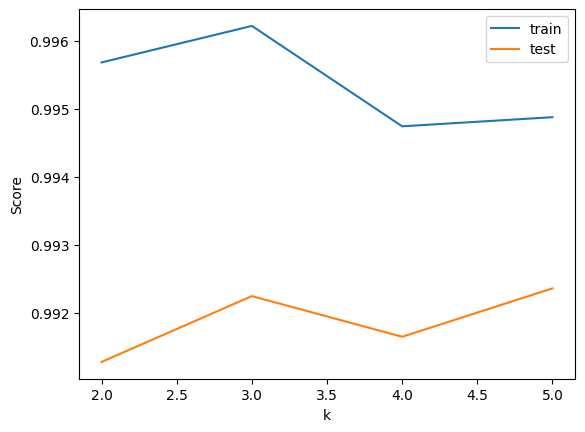

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN_accuracy_test = []
kNN_accuracy_train = []


for k in range(2,6):
    kNN = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski', p=1)
    kNN.fit(x_train,y_train)
    kNN_accuracy_train.append(kNN.score(x_train,y_train))
    kNN_accuracy_test.append(kNN.score(x_test,y_test))

plt.plot(np.arange(2,6), kNN_accuracy_train, label = 'train')
plt.plot(np.arange(2,6), kNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.savefig('KNNTuning.png', dpi=300, format='png')
plt.show()

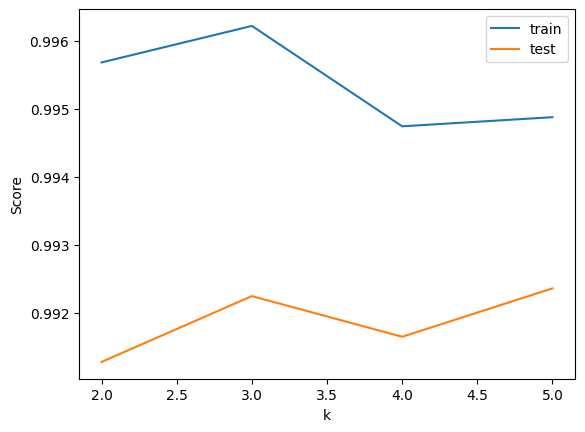

In [ ]:
plt.plot(np.arange(2,6), kNN_accuracy_train, label = 'train')
plt.plot(np.arange(2,6), kNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.savefig('KNNTuning.png', dpi=300, format='png')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],  # Add or modify kernel options as needed
              'gamma': [1, 0.1, 0.01, 0.001]}  # Add or modify gamma values as needed

grid = GridSearchCV(SVC(), parameters, refit=True, verbose=2, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

best_params_svm = grid.best_params_
print(best_params_svm)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB ,svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(x_train,y_train)
    dump(model, 'U'+model_names[i]+'Normalization.joblib')
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_normalization = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_normalization)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1 Score  False Alarm  \
RandomForestClassifier  0.995807   0.975647  0.986522  0.981054           95   
DecisionTreeClassifier  0.994838   0.976666  0.976413  0.976539           90   
LogisticRegression      0.986024   0.913759  0.963971  0.938194          351   
K-Nearest Neighbors     0.991044   0.962663  0.955677  0.959157          143   
KNNWithBestParam        0.992242   0.970357  0.958787  0.964537          113   
Naive Bayes Classifier  0.978352   0.845639  0.982633  0.909004          692   
SVM                     0.990217   0.931924  0.982893  0.956730          277   
SVMWithBestParam        0.992499   0.967490  0.964230  0.965857          125   

                        False Alarm Rate             Confusion Matrix  
RandomForestClassifier          0.003045    [[31108, 95], [52, 3806]]  
DecisionTreeClassifier          0.002884    [[31113, 90], [91, 3767]]  
LogisticRegression              0.011249  [[30852, 351], [139, 

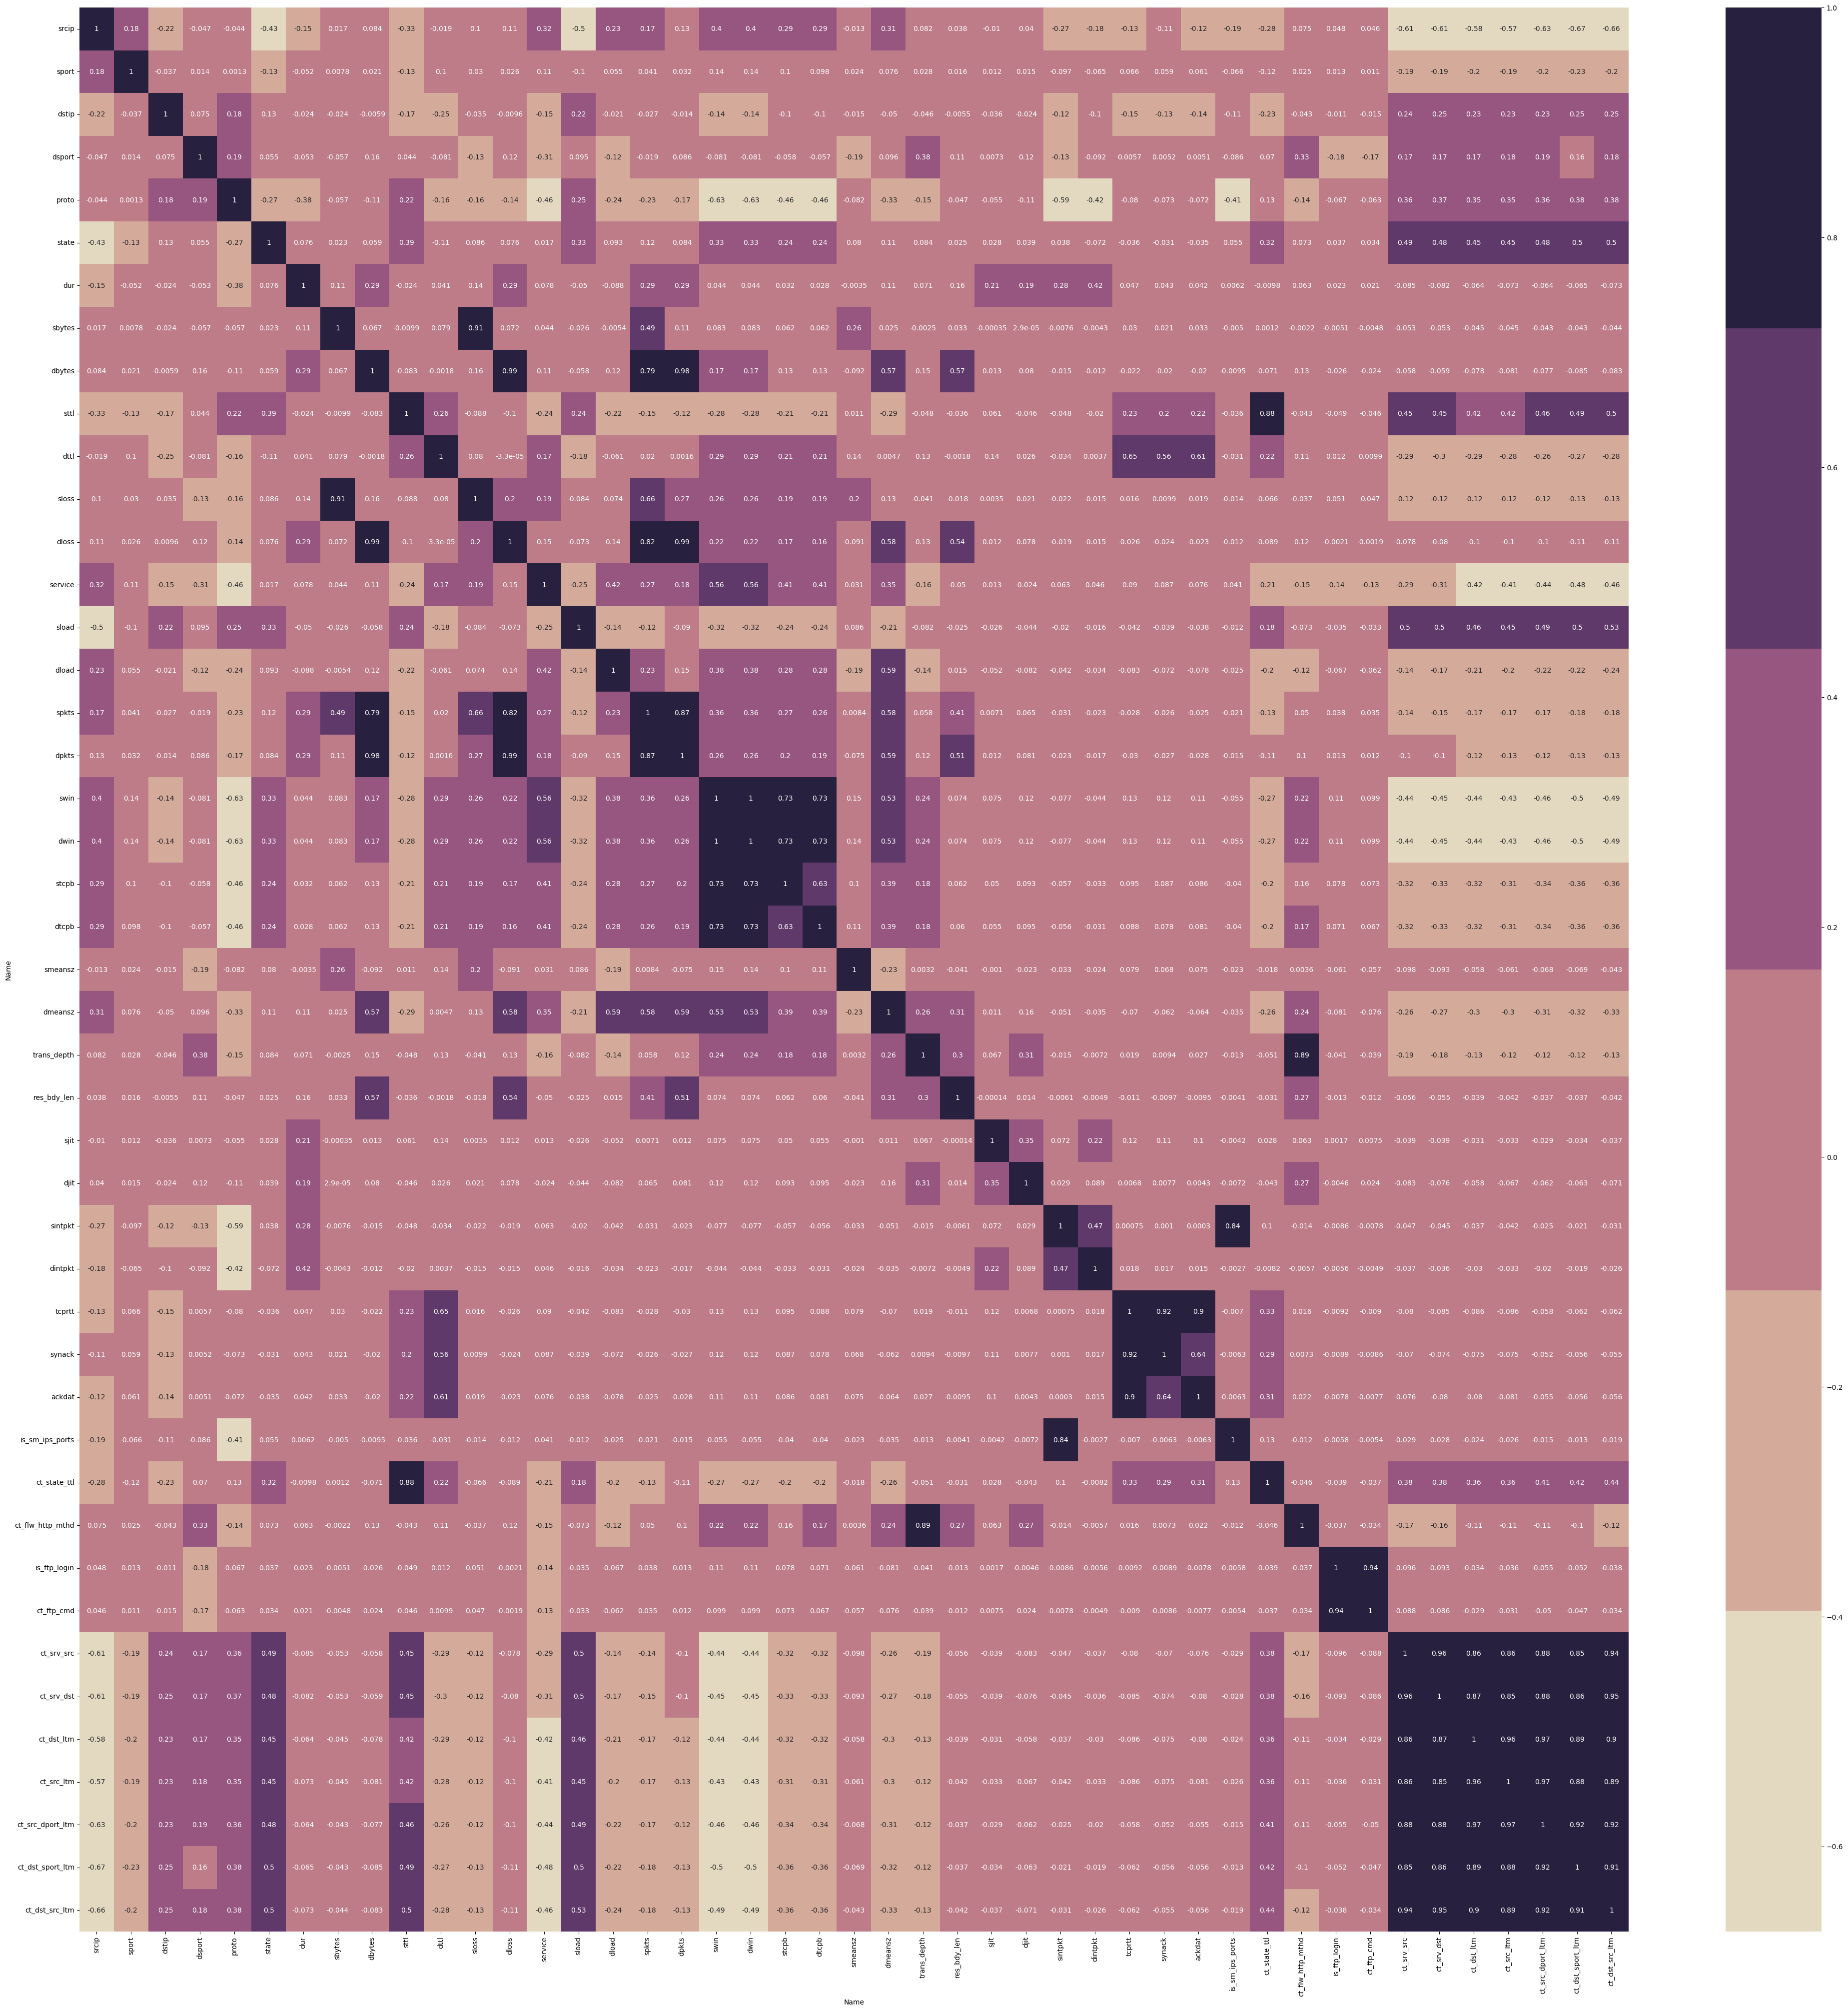

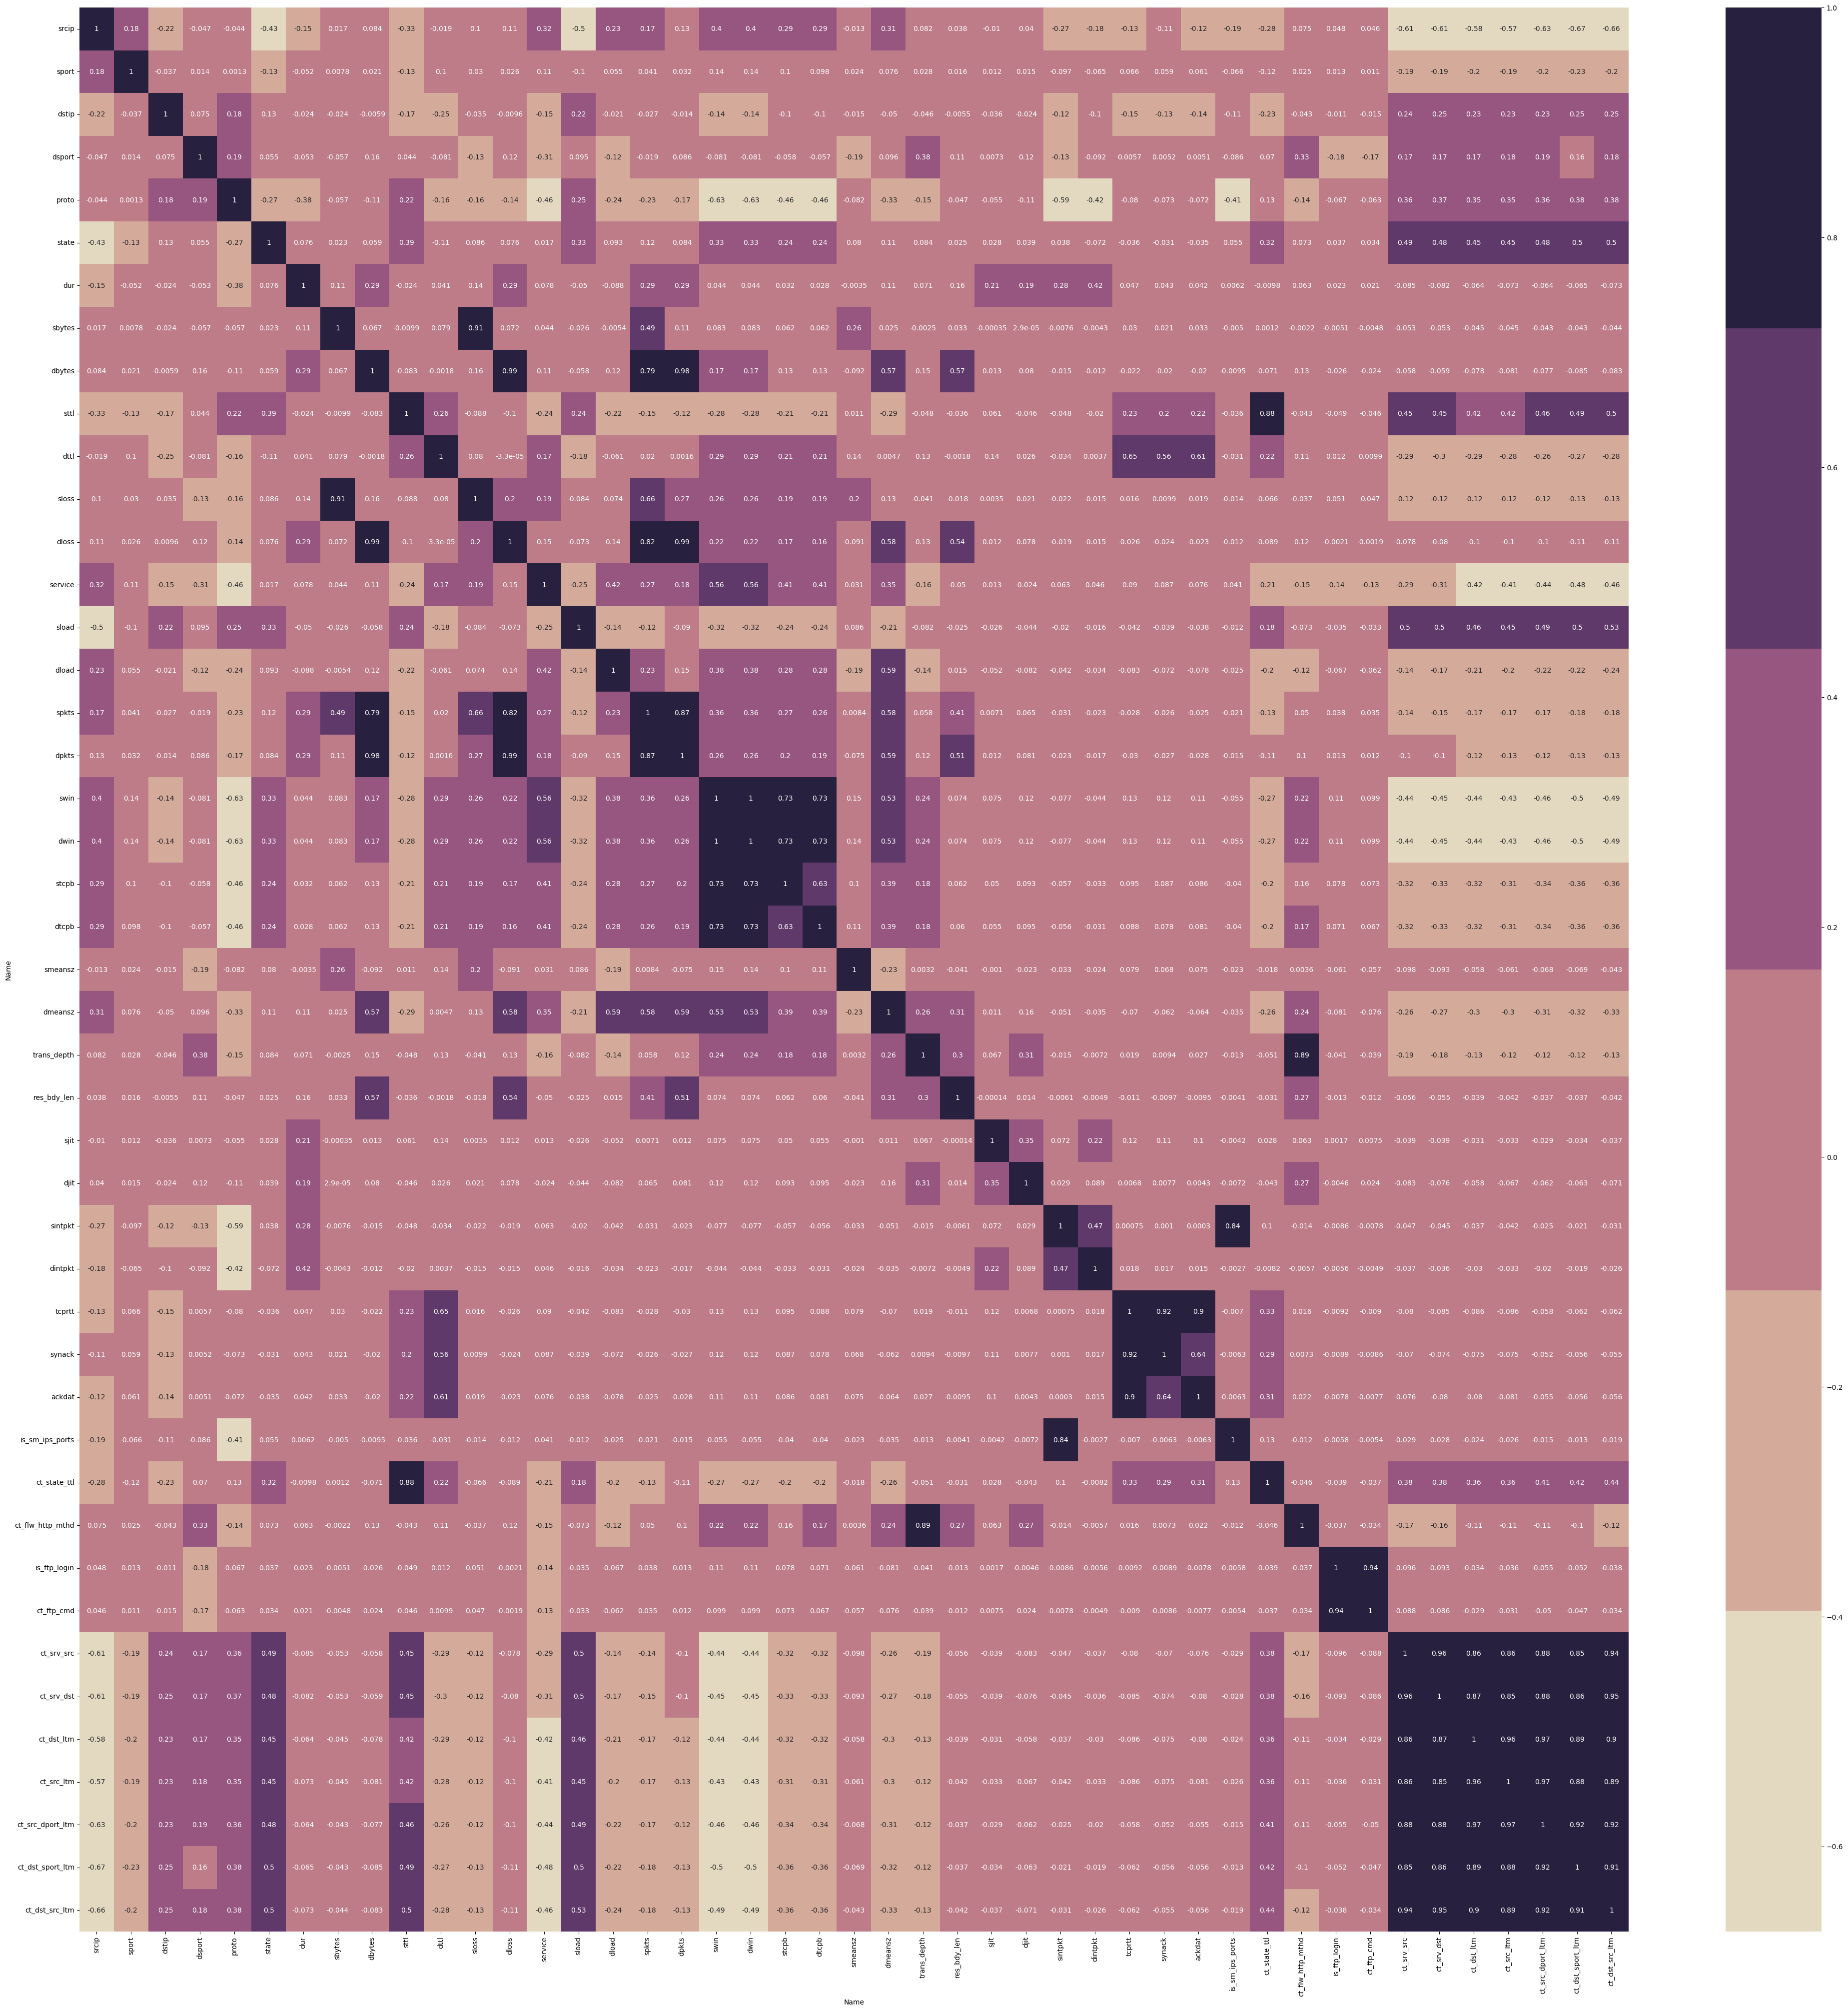

In [ ]:
train = x_train
#corr=train.corr()
#train.head(20)
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
plt.show()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

['dloss', 'dpkts', 'dwin', 'ct_src_dport_ltm']


In [ ]:
x_train_selected = x_train.drop(to_drop, axis=1)
x_test_selected = x_test.drop(to_drop, axis=1)
x_train_selected.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
7126,1.000000,0.212084,0.523810,0.715847,0.750,0.363636,0.000075,0.000200,0.000118,0.121569,...,0.0,0.0,0.0,0.0,0.086207,0.086207,0.056604,0.000000,0.0,0.0
59855,0.914286,0.334480,0.142857,0.734376,0.875,0.181818,0.000017,0.000016,0.000012,0.121569,...,0.0,0.0,0.0,0.0,0.017241,0.000000,0.000000,0.000000,0.0,0.0
43703,0.971429,0.950365,0.119048,0.658878,0.750,0.363636,0.000419,0.000408,0.002222,0.121569,...,0.0,0.0,0.0,0.0,0.137931,0.068966,0.000000,0.075472,0.0,0.0
41078,0.857143,0.087106,0.476190,0.079428,0.750,0.363636,0.000283,0.000408,0.002222,0.121569,...,0.0,0.0,0.0,0.0,0.103448,0.103448,0.000000,0.018868,0.0,0.0
43707,0.971429,0.975913,0.500000,0.555695,0.750,0.363636,0.000303,0.000305,0.000981,0.121569,...,0.0,0.0,0.0,0.0,0.137931,0.155172,0.037736,0.075472,0.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

# create models
Rf =  RandomForestClassifier(random_state=88)
dt = DecisionTreeClassifier(random_state=88)
Lr = LogisticRegression(random_state=88)
NB = GaussianNB()
kNN_best_param = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
kNN = KNeighborsClassifier()
svm = SVC(random_state=88)
svm_best_param = SVC(kernel='poly',gamma=1,random_state=88)

# fit models and make predictions
models = [Rf, dt,Lr,kNN,kNN_best_param,NB, svm,svm_best_param]
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier','LogisticRegression','K-Nearest Neighbors','KNNWithBestParam','Naive Bayes Classifier','SVM','SVMWithBestParam']
results = []
i=0
for model in models:
    model.fit(x_train_selected,y_train)
    dump(model, 'U'+model_names[i]+'ColumnsCorr.joblib')
    y_pred = model.predict(x_test_selected)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    false_alarms = Conf_Mat[0,1]
    TN = Conf_Mat[0, 0]  # True negatives
    FP = Conf_Mat[0, 1]  # False positives

    false_alarm_rate = FP / (TN + FP)
    results.append([acc, prec, recall, f1,false_alarms,false_alarm_rate,Conf_Mat])
    i=i+1
# create dataframe with results
metrics_df_Columns_Corr = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','False Alarm','False Alarm Rate','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_Corr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                        Accuracy  Precision    Recall  F1 Score  False Alarm  \
RandomForestClassifier  0.995836   0.975897  0.986522  0.981181           94   
DecisionTreeClassifier  0.994980   0.977438  0.976931  0.977184           87   
LogisticRegression      0.986053   0.913984  0.963971  0.938312          350   
K-Nearest Neighbors     0.991044   0.962422  0.955936  0.959168          144   
KNNWithBestParam        0.992128   0.970079  0.958009  0.964006          114   
Naive Bayes Classifier  0.979750   0.854345  0.983670  0.914458          647   
SVM                     0.990246   0.931941  0.983152  0.956862          277   
SVMWithBestParam        0.992727   0.967558  0.966304  0.966930          125   

                        False Alarm Rate             Confusion Matrix  
RandomForestClassifier          0.003013    [[31109, 94], [52, 3806]]  
DecisionTreeClassifier          0.002788    [[31116, 87], [89, 3769]]  
LogisticRegression              0.011217  [[30853, 350], [139, 

In [ ]:
print('init state:\n ',metrics_df_init.iloc[:,0:4])
print('apres normalisation: \n',metrics_df_normalization.iloc[:,0:4])
print('correlation colonnes:\n ',metrics_df_Columns_Corr.iloc[:,0:4])

init state:
                          Accuracy  Precision    Recall  F1 Score
RandomForestClassifier  0.989247   0.911174  0.999741  0.953405
DecisionTreeClassifier  0.992099   0.938311  0.993520  0.965127
LogisticRegression      0.789766   0.338155  0.951270  0.498946
K-Nearest Neighbors     0.944012   0.676410  0.941680  0.787301
Naive Bayes Classifier  0.738627   0.283003  0.896838  0.430241
SVM                     0.647443   0.199519  0.731726  0.313545
apres normalisation: 
                         Accuracy  Precision    Recall  F1 Score
RandomForestClassifier  0.995807   0.975647  0.986522  0.981054
DecisionTreeClassifier  0.994838   0.976666  0.976413  0.976539
LogisticRegression      0.986024   0.913759  0.963971  0.938194
K-Nearest Neighbors     0.991044   0.962663  0.955677  0.959157
KNNWithBestParam        0.992242   0.970357  0.958787  0.964537
Naive Bayes Classifier  0.978352   0.845639  0.982633  0.909004
SVM                     0.990217   0.931924  0.982893  0.956730
SVM

<BarContainer object of 6 artists>

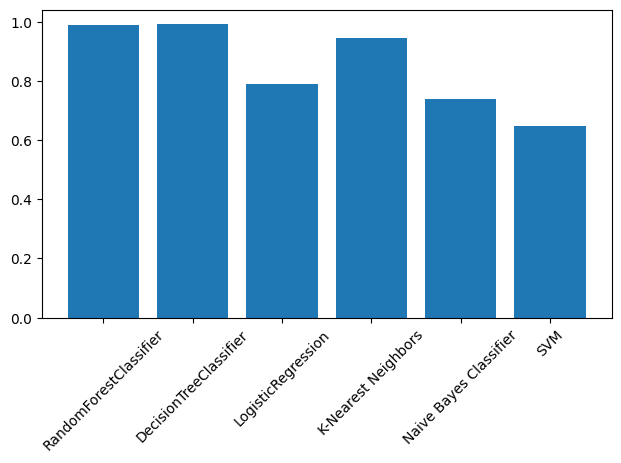

In [ ]:
plt.figure(figsize=(25,4),num=10)
plt.subplot(131)
plt.xticks(rotation=45)
plt.bar(metrics_df_init.index,metrics_df_init['Accuracy'])

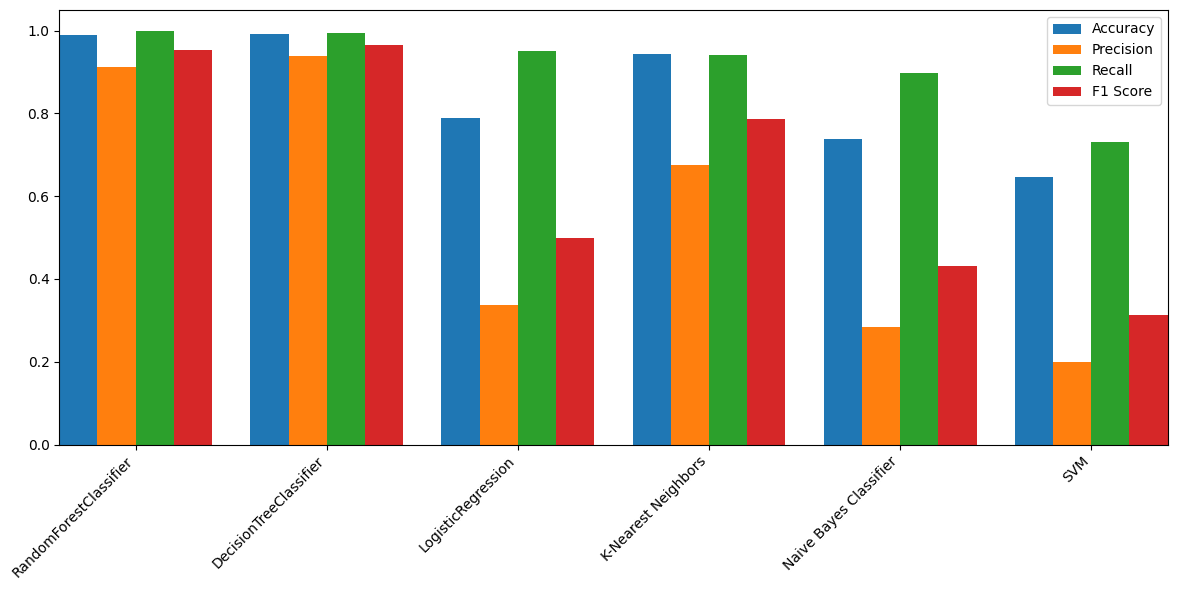

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_init.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_init.columns[:-3]):
    values = metrics_df_init[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as an SVG file
plt.savefig('metrics_df_init.png', dpi=300, format='png')
plt.show()


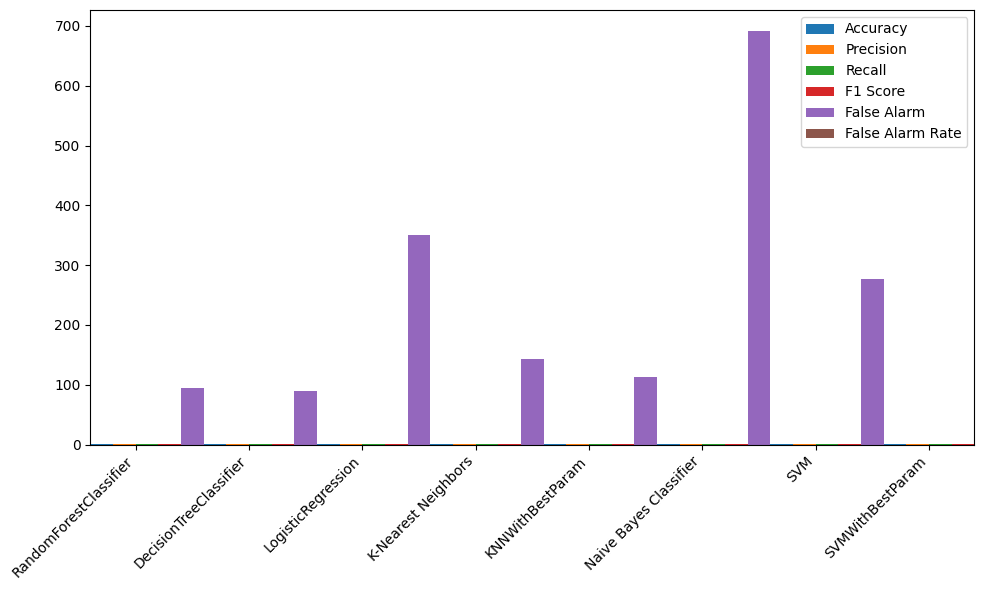

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_normalization.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_normalization.columns[:-1]):
    values = metrics_df_normalization[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_normalization.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_normalization.svg', dpi=300, format='svg')
plt.show()


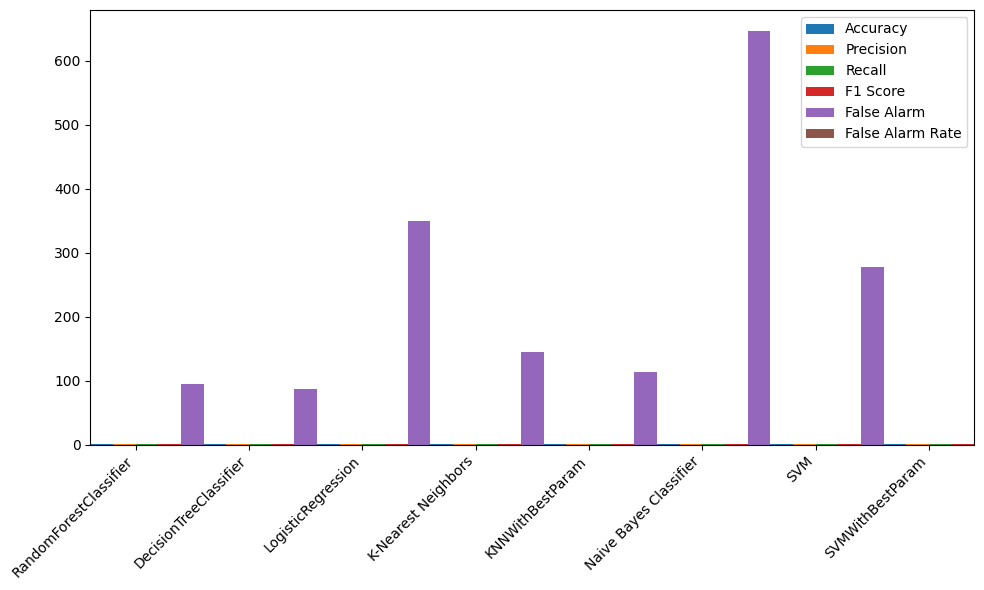

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = metrics_df_Columns_Corr.index
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_Corr.columns[:-1]):
    values = metrics_df_Columns_Corr[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('metrics_df_Columns_Corr.pdf', dpi=300, format='pdf')

# Save the figure as an SVG file
plt.savefig('metrics_df_Columns_Corr.svg', dpi=300, format='svg')
plt.show()


<Figure size 1600x1000 with 0 Axes>

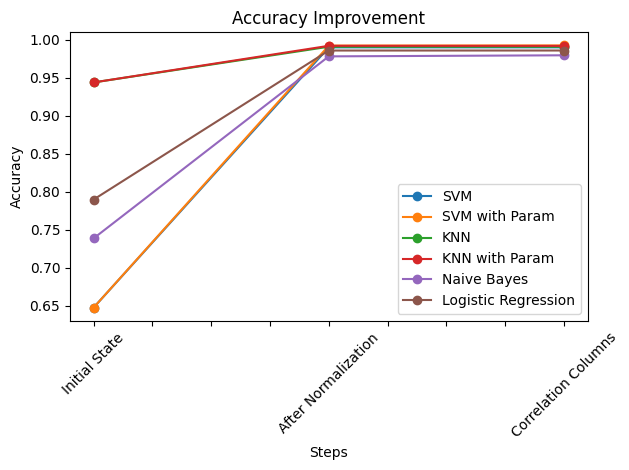

In [ ]:
AccuracyImprovement = {
  'Step': ['Initial State', 'After Normalization','Correlation Columns'],
  'SVM': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][6]
          ,metrics_df_Columns_Corr['Accuracy'][6],
          ],
  'SVM with Param': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][7],
                     metrics_df_Columns_Corr['Accuracy'][7],
                     ],
    'KNN':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][3],
                     metrics_df_Columns_Corr['Accuracy'][3],
                     ],
    'KNN with Param':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][4],
              metrics_df_Columns_Corr['Accuracy'][4]],
    'Naive Bayes':[metrics_df_init['Accuracy'][4], metrics_df_normalization['Accuracy'][5],
                     metrics_df_Columns_Corr['Accuracy'][5]],
    'Logistic Regression':[metrics_df_init['Accuracy'][2], metrics_df_normalization['Accuracy'][2],metrics_df_Columns_Corr['Accuracy'][2]]
}
AccuracyImprovement = pd.DataFrame(AccuracyImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracyImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracyImprovement.loc[['Initial State', 'After Normalization','Correlation Columns']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Improvement')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_improvement_plot.png', format='png')

# Show the plot
plt.show()

In [ ]:
AccuracyImprovement.to_excel('AccuracyImprovement.xlsx')

<Figure size 1600x1000 with 0 Axes>

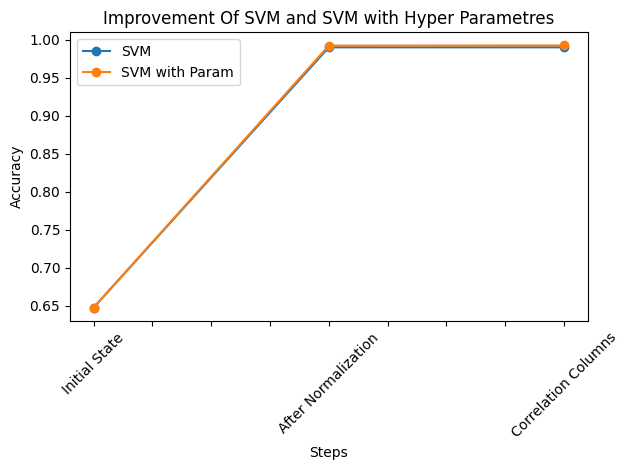

In [ ]:
AccuracySvmImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Correlation Columns',],
  'SVM': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][6],metrics_df_Columns_Corr['Accuracy'][6]],
  'SVM with Param': [metrics_df_init['Accuracy'][5], metrics_df_normalization['Accuracy'][7],
                     metrics_df_Columns_Corr['Accuracy'][7]],

}
AccuracySvmImprovement = pd.DataFrame(AccuracySvmImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracySvmImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracySvmImprovement.loc[['Initial State', 'After Normalization', 'Correlation Columns']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Improvement Of SVM and SVM with Hyper Parametres')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param'])
plt.subplots_adjust(hspace=1.0)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_svm_improvement_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

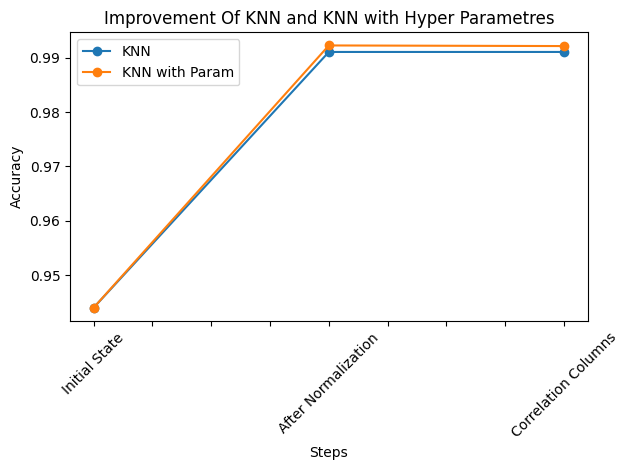

In [ ]:
AccuracyKnnImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Correlation Columns'],

    'KNN':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][3],
                     metrics_df_Columns_Corr['Accuracy'][3]],
    'KNN with Param':[metrics_df_init['Accuracy'][3], metrics_df_normalization['Accuracy'][4],metrics_df_Columns_Corr['Accuracy'][4]],

}
AccuracyKnnImprovement = pd.DataFrame(AccuracyKnnImprovement)

# Set the 'Step' column as the index for easier plotting
AccuracyKnnImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AccuracyKnnImprovement.loc[['Initial State', 'After Normalization','Correlation Columns']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Improvement Of KNN and KNN with Hyper Parametres')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['KNN','KNN with Param'])
plt.subplots_adjust(hspace=1.0)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('accuracy_knn_improvement_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

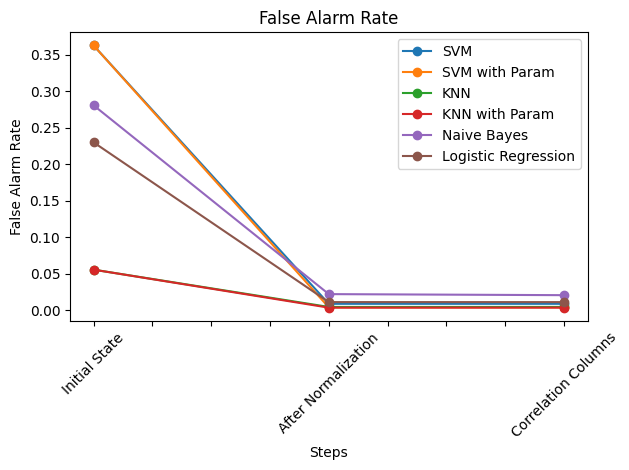

In [ ]:
AlarmImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Correlation Columns'],
  'SVM': [metrics_df_init['False Alarm Rate'][5], metrics_df_normalization['False Alarm Rate'][6],
          metrics_df_Columns_Corr['False Alarm Rate'][6]
          ],
  'SVM with Param': [metrics_df_init['False Alarm Rate'][5], metrics_df_normalization['False Alarm Rate'][7],
                     metrics_df_Columns_Corr['False Alarm Rate'][7]],
    'KNN':[metrics_df_init['False Alarm Rate'][3], metrics_df_normalization['False Alarm Rate'][3],
                     metrics_df_Columns_Corr['False Alarm Rate'][3]],
    'KNN with Param':[metrics_df_init['False Alarm Rate'][3], metrics_df_normalization['False Alarm Rate'][4],
                     metrics_df_Columns_Corr['False Alarm Rate'][4]],
    'Naive Bayes':[metrics_df_init['False Alarm Rate'][4], metrics_df_normalization['False Alarm Rate'][5],metrics_df_Columns_Corr['False Alarm Rate'][5]],
    'Logistic Regression':[metrics_df_init['False Alarm Rate'][2], metrics_df_normalization['False Alarm Rate'][2],metrics_df_Columns_Corr['False Alarm Rate'][2]]
}
AlarmImprovement = pd.DataFrame(AlarmImprovement)

# Set the 'Step' column as the index for easier plotting
AlarmImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
AlarmImprovement.loc[['Initial State', 'After Normalization', 'Correlation Columns']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('False Alarm Rate')
plt.title('False Alarm Rate')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('FalseAlarm_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

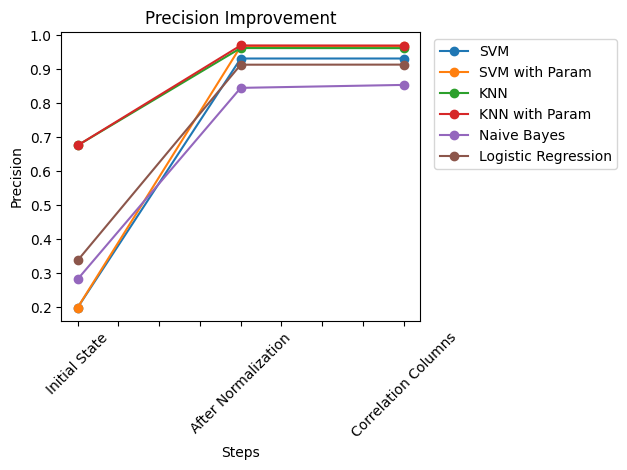

In [ ]:
PrecisionImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Correlation Columns'],
  'SVM': [metrics_df_init['Precision'][5], metrics_df_normalization['Precision'][6],metrics_df_Columns_Corr['Precision'][6]],
  'SVM with Param': [metrics_df_init['Precision'][5], metrics_df_normalization['Precision'][7],
                     metrics_df_Columns_Corr['Precision'][7],
                     ],
    'KNN':[metrics_df_init['Precision'][3], metrics_df_normalization['Precision'][3],
                     metrics_df_Columns_Corr['Precision'][3],
                     ],
    'KNN with Param':[metrics_df_init['Precision'][3], metrics_df_normalization['Precision'][4],
                     metrics_df_Columns_Corr['Precision'][4],
                     ],
    'Naive Bayes':[metrics_df_init['Precision'][4], metrics_df_normalization['Precision'][5],
                     metrics_df_Columns_Corr['Precision'][5],
                  ],
    'Logistic Regression':[metrics_df_init['Precision'][2], metrics_df_normalization['Precision'][2],
                     metrics_df_Columns_Corr['Precision'][2]]
}
PrecisionImprovement = pd.DataFrame(PrecisionImprovement)

# Set the 'Step' column as the index for easier plotting
PrecisionImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
PrecisionImprovement.loc[['Initial State', 'After Normalization', 'Correlation Columns' ]].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision Improvement')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'], loc='upper left', bbox_to_anchor=(1.02, 1.0))

plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('precision_plot.png', format='png')

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

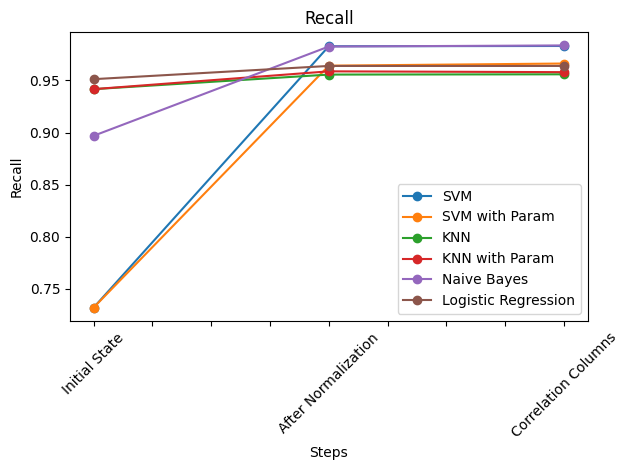

In [ ]:
RecallImprovement = {
  'Step': ['Initial State', 'After Normalization', 'Correlation Columns'],
  'SVM': [metrics_df_init['Recall'][5], metrics_df_normalization['Recall'][6],metrics_df_Columns_Corr['Recall'][6]
         ],
  'SVM with Param': [metrics_df_init['Recall'][5], metrics_df_normalization['Recall'][7]
                     ,metrics_df_Columns_Corr['Recall'][7]
                     ],
    'KNN':[metrics_df_init['Recall'][3], metrics_df_normalization['Recall'][3],
                     metrics_df_Columns_Corr['Recall'][3],
                     ],
    'KNN with Param':[metrics_df_init['Recall'][3], metrics_df_normalization['Recall'][4],
                     metrics_df_Columns_Corr['Recall'][4],
                     ],
    'Naive Bayes':[metrics_df_init['Recall'][4], metrics_df_normalization['Recall'][5],
                   metrics_df_Columns_Corr['Recall'][5],
                    ],
    'Logistic Regression':[metrics_df_init['Recall'][2], metrics_df_normalization['Recall'][2],
                     metrics_df_Columns_Corr['Recall'][2],
                     ]
}
RecallImprovement = pd.DataFrame(RecallImprovement)

# Set the 'Step' column as the index for easier plotting
RecallImprovement.set_index('Step', inplace=True)

# Plot the improvement of SVM and SVM with Param across all steps
plt.figure(figsize=(16, 10))
RecallImprovement.loc[['Initial State', 'After Normalization',  'Correlation Columns']].plot(marker='o')

# Add labels and title to the plot
plt.xlabel('Steps')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation=45)

# Add a legend to distinguish SVM and SVM with Param
plt.legend(['SVM', 'SVM with Param','KNN','KNN with Param','Naive Bayes','Logistic Regression'])
plt.subplots_adjust(hspace=1.0)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as an SVG file
plt.savefig('Recall_improvement_plot.png', format='png')

# Show the plot
plt.show()

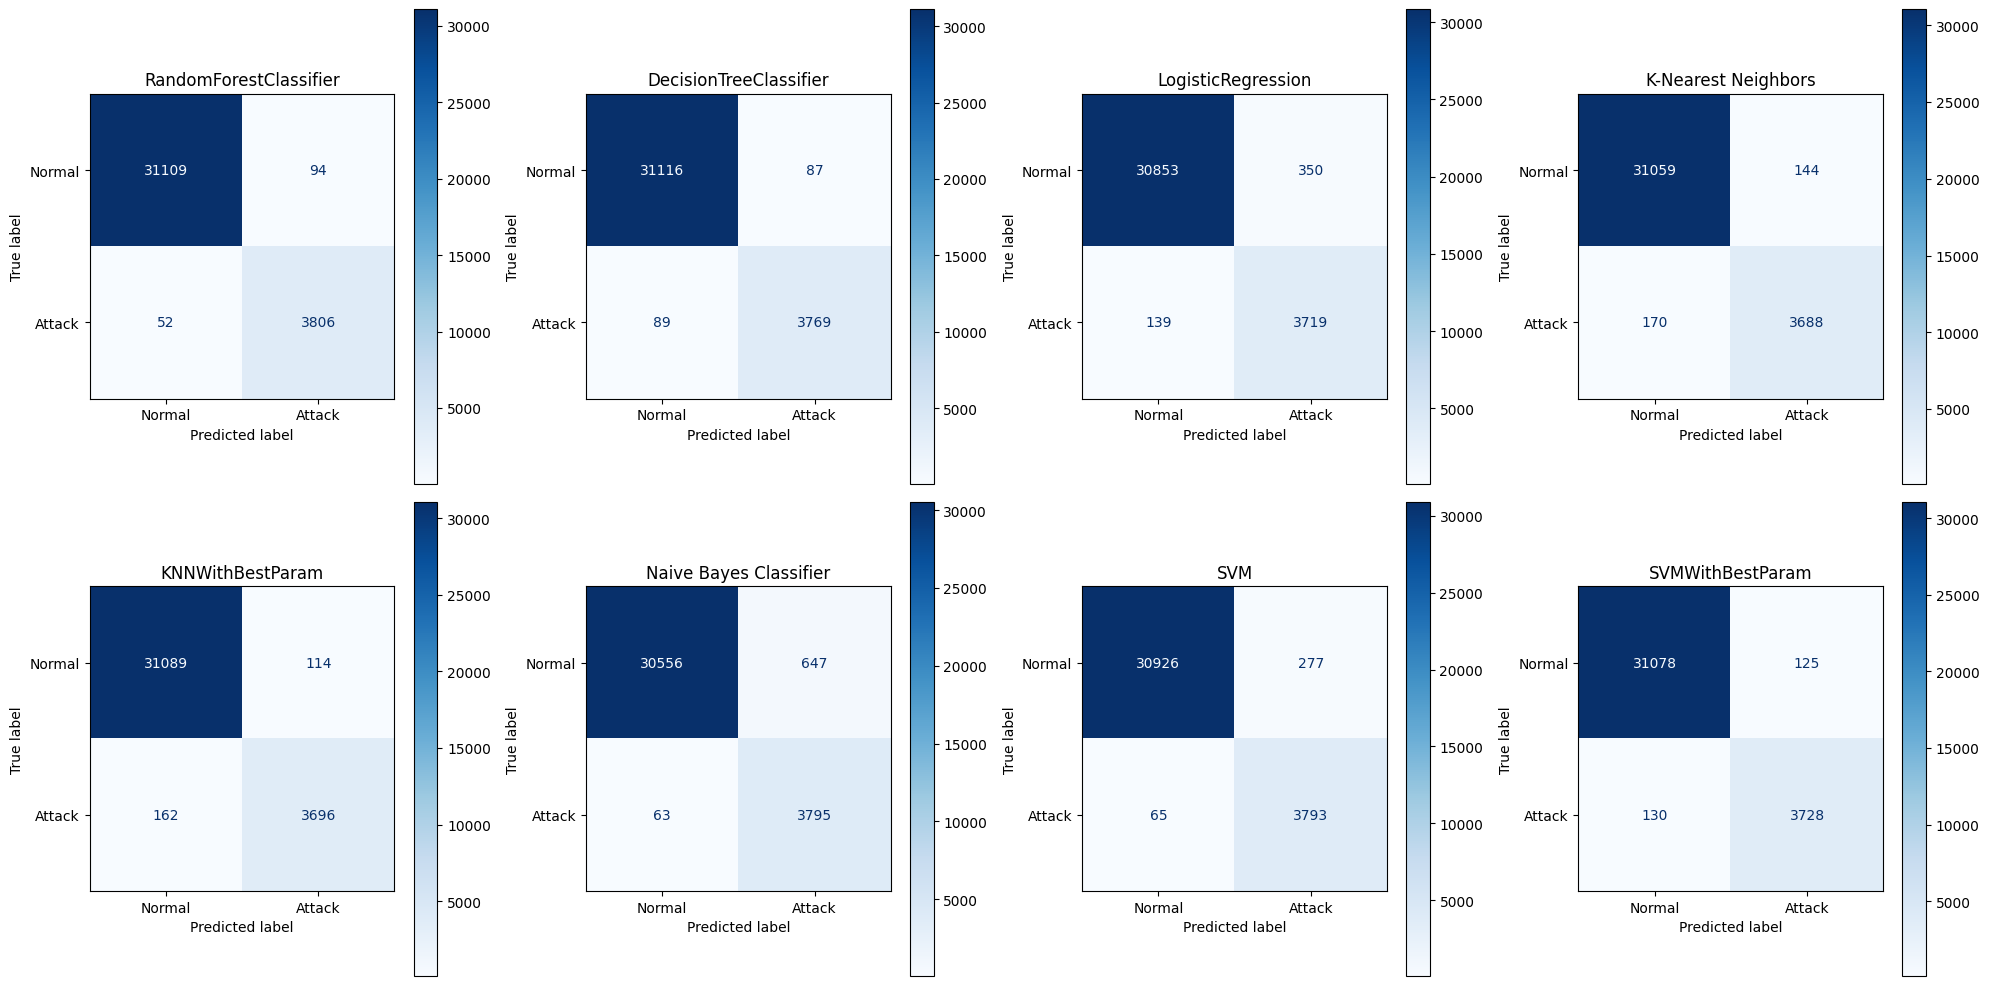

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming metrics_df_Columns_Corr is the DataFrame containing your results
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, (model_name, (_, _, _, _, _, _, conf_matrix)) in enumerate(metrics_df_Columns_Corr.iterrows()):
    row, col = divmod(i, 4)

    # Use ConfusionMatrixDisplay to plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Normal', 'Attack'])
    disp.plot(ax=axes[row, col], cmap='Blues', values_format='d')
    axes[row, col].set_title(model_name)

plt.tight_layout()
plt.savefig('confusion_matrices_corr.png')
plt.savefig('confusion_matrices_corr.svg', dpi=300, format='svg')
plt.show()


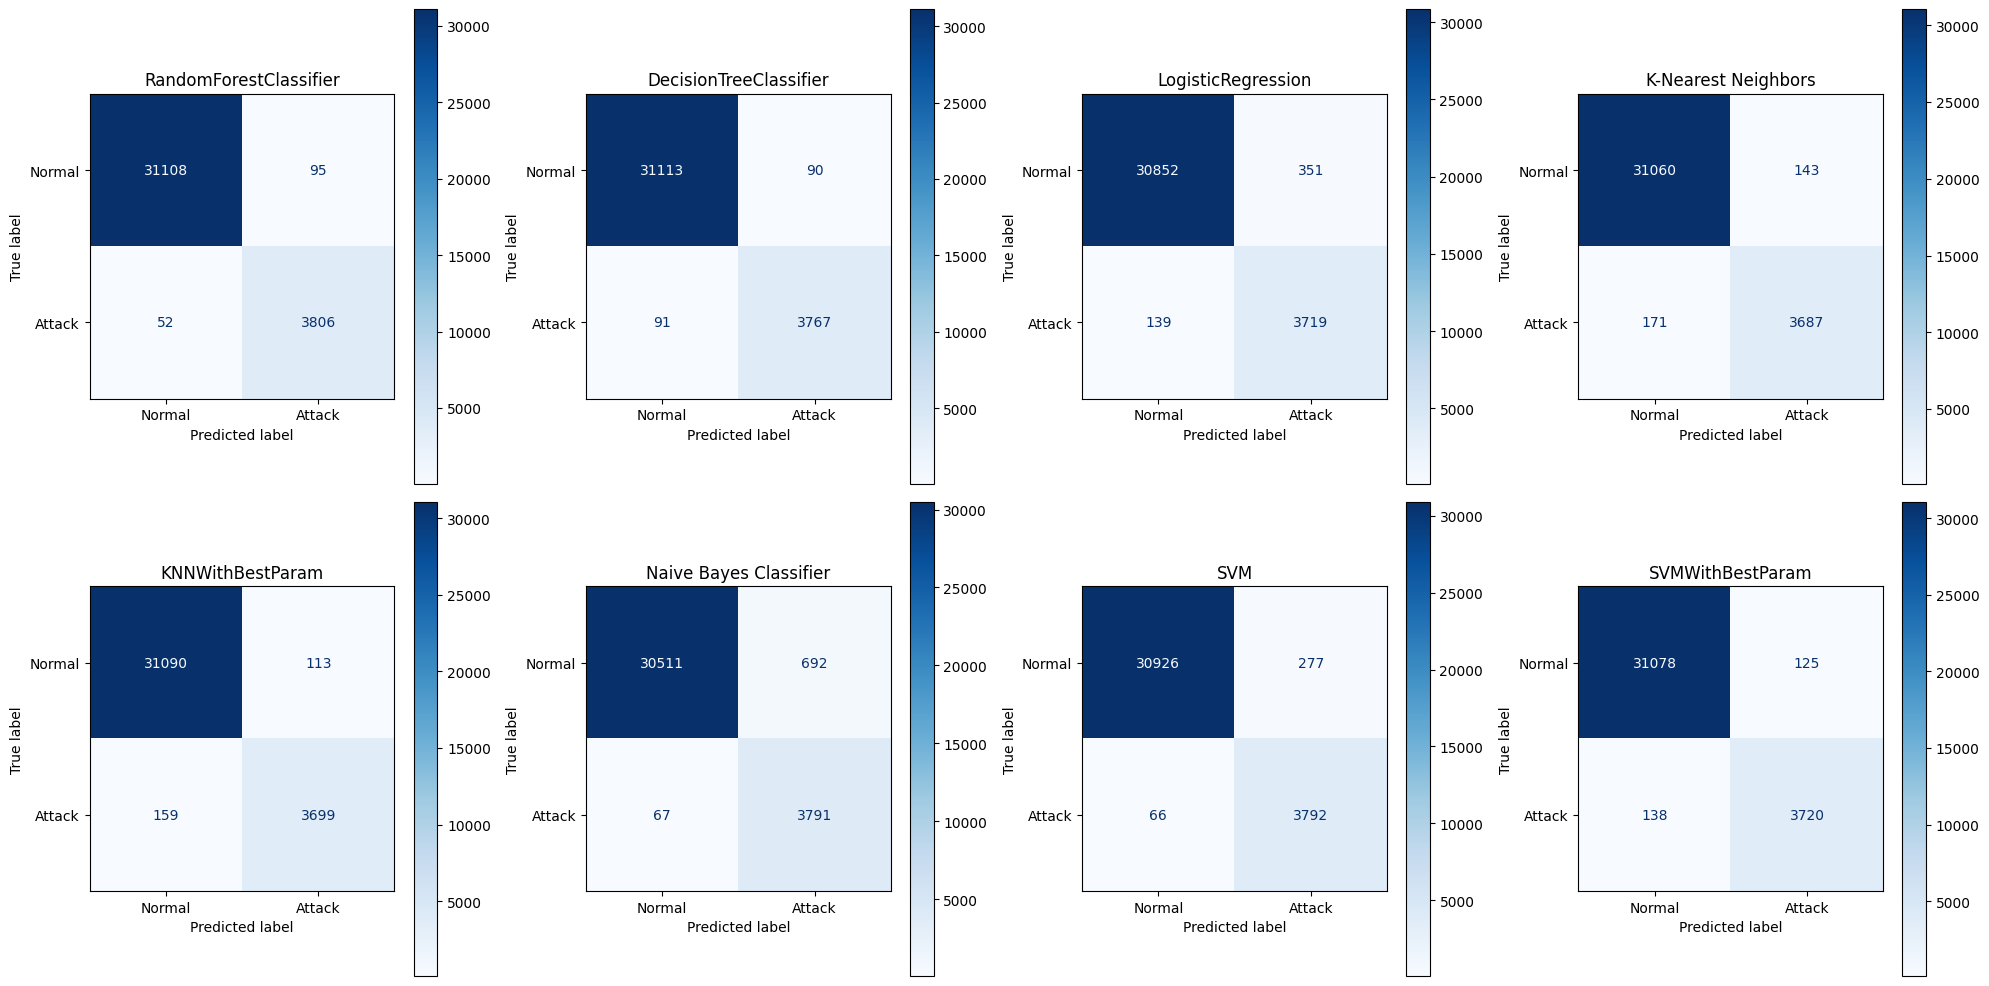

In [ ]:
# Assuming metrics_df_normalization is the DataFrame containing your results
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, (model_name, (_, _, _, _, _, _, conf_matrix)) in enumerate(metrics_df_normalization.iterrows()):
    row, col = divmod(i, 4)

    # Use ConfusionMatrixDisplay to plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Normal', 'Attack'])
    disp.plot(ax=axes[row, col], cmap='Blues', values_format='d')
    axes[row, col].set_title(model_name)

plt.tight_layout()
plt.savefig('confusion_matrices_normal.png')
plt.savefig('confusion_matrices_normal.svg', dpi=300, format='svg')
plt.show()

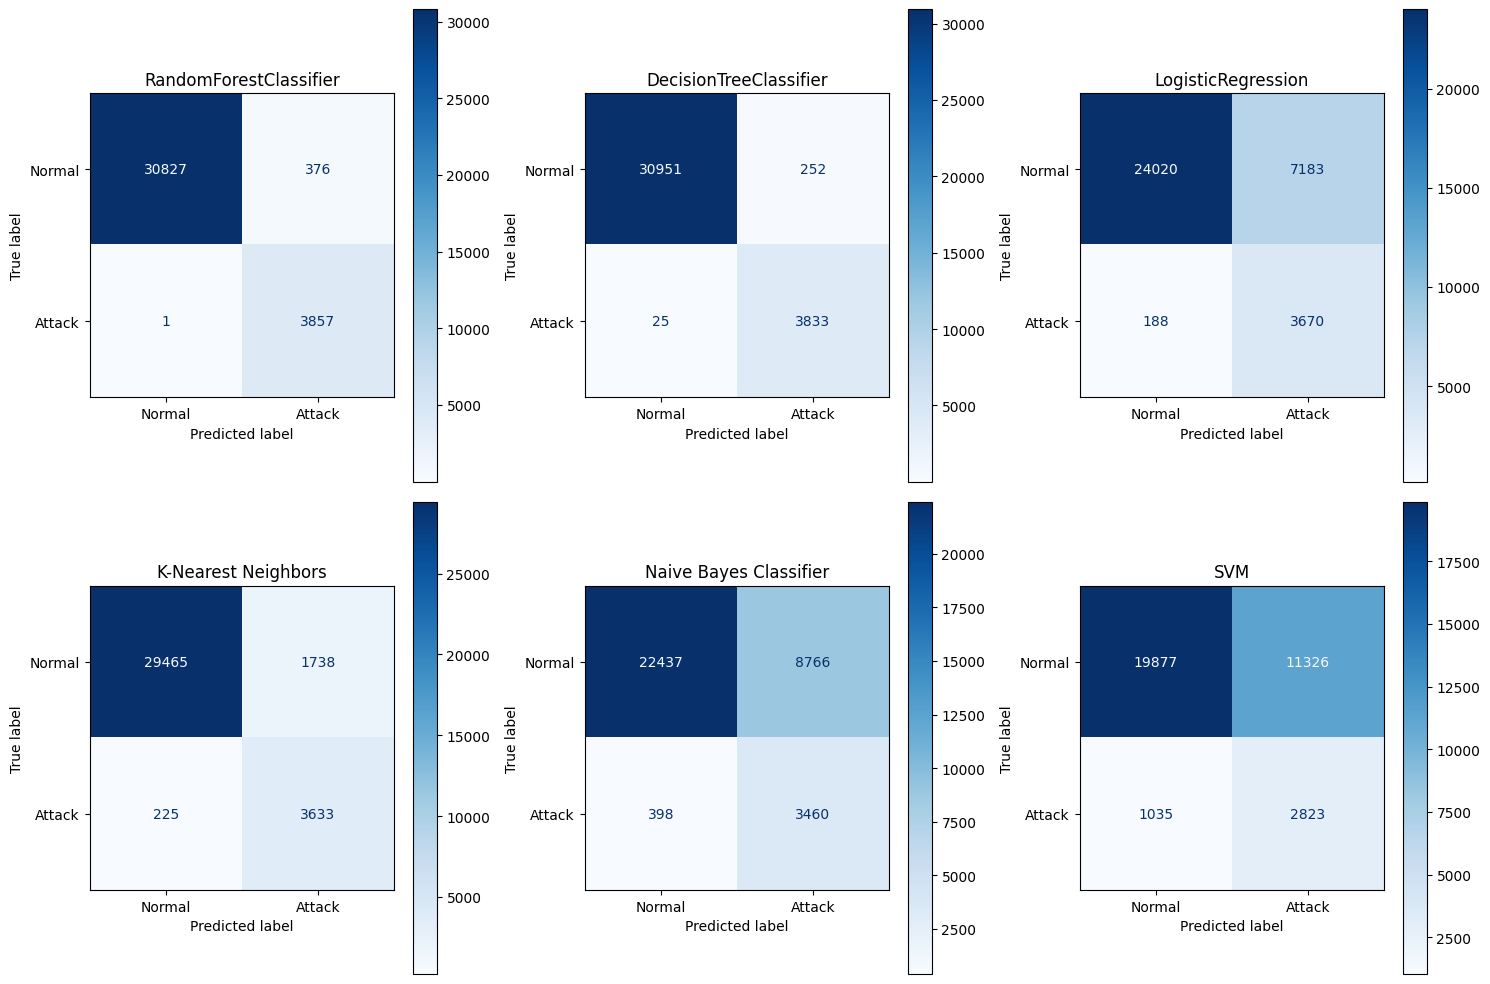

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming metrics_df_init is the DataFrame containing your results
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (model_name, (_, _, _, _, _, _, conf_matrix)) in enumerate(metrics_df_init.iterrows()):
    row, col = divmod(i, 3)

    # Use ConfusionMatrixDisplay to plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Normal', 'Attack'])
    disp.plot(ax=axes[row, col], cmap='Blues', values_format='d')
    axes[row, col].set_title(model_name)

plt.tight_layout()
plt.savefig('confusion_matrices_init.png')
plt.savefig('confusion_matrices_init.svg', dpi=300, format='svg')
plt.show()

In [ ]:
plt.savefig('confusion_matrices_init.png')
plt.savefig('confusion_matrices_init.svg', dpi=300, format='svg')

<Figure size 640x480 with 0 Axes>

In [ ]:
import shutil
import os

# Set the path to the content folder
content_folder_path = '/content/'

# Set the path for the zip file
zip_file_path = '/content/content.zip'

# Create a zip file of the entire content folder
shutil.make_archive(zip_file_path[:-4], 'zip', content_folder_path)

# Move the zip file to /content/ folder
shutil.move(zip_file_path, content_folder_path)

# Download the zip file
from google.colab import files
files.download(os.path.join(content_folder_path, 'content.zip'))


RuntimeError: ignored